In [40]:
import pandas as pd
import numpy as np                     
import matplotlib as plt                     
import tensorflow as tf              
import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [41]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [42]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [43]:
aug_data = ImageDataGenerator(
    rotation_range = 11,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.1,
    zoom_range = 0.1,
    brightness_range = [0.8, 1.2]
)

In [44]:
aug_data_images = np.array([aug_data.random_transform(img) for img in x_train])
aug_data_labels = y_train

aug_train_images = np.concatenate([
    x_train,
    aug_data_images
])

aug_train_labels = np.concatenate([
    y_train,
    aug_data_labels
])

In [45]:
aug_data_images = np.array([aug_data.random_transform(img) for img in x_test])
aug_data_labels = y_test

aug_test_images = np.concatenate([
    x_test,
    aug_data_images
])

aug_test_labels = np.concatenate([
    y_test,
    aug_data_labels
])

In [46]:
x_train1 = aug_train_images
y_train1 = aug_train_labels

x_test1 = aug_test_images
y_test1 = aug_test_labels

In [47]:
x_train = x_train/255
x_test = x_test/255

x_train1 = x_train1/255
x_test1 = x_test1/255

In [48]:
inputs = Input(shape=(28, 28, 1))

# First Conv2D layer
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inputs)
x = MaxPooling2D()(x)

# Second Conv2D layer (use 'x' as input, not 'inputs')
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

# Flatten and Dense layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

# Output layer
outputs = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs, outputs)

# Display the model architecture
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8902 - loss: 0.3626 - val_accuracy: 0.9835 - val_loss: 0.0552
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9834 - loss: 0.0511 - val_accuracy: 0.9850 - val_loss: 0.0529
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accuracy: 0.9884 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9877 - val_loss: 0.0441
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9933 - loss: 0.0185 - val_accuracy: 0.9856 - val_loss: 0.0498
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9875 - val_loss: 0.0450
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9965 - loss: 0.0100 - val_accuracy: 0.9903 - val_loss: 0.0364
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9974 - loss: 0

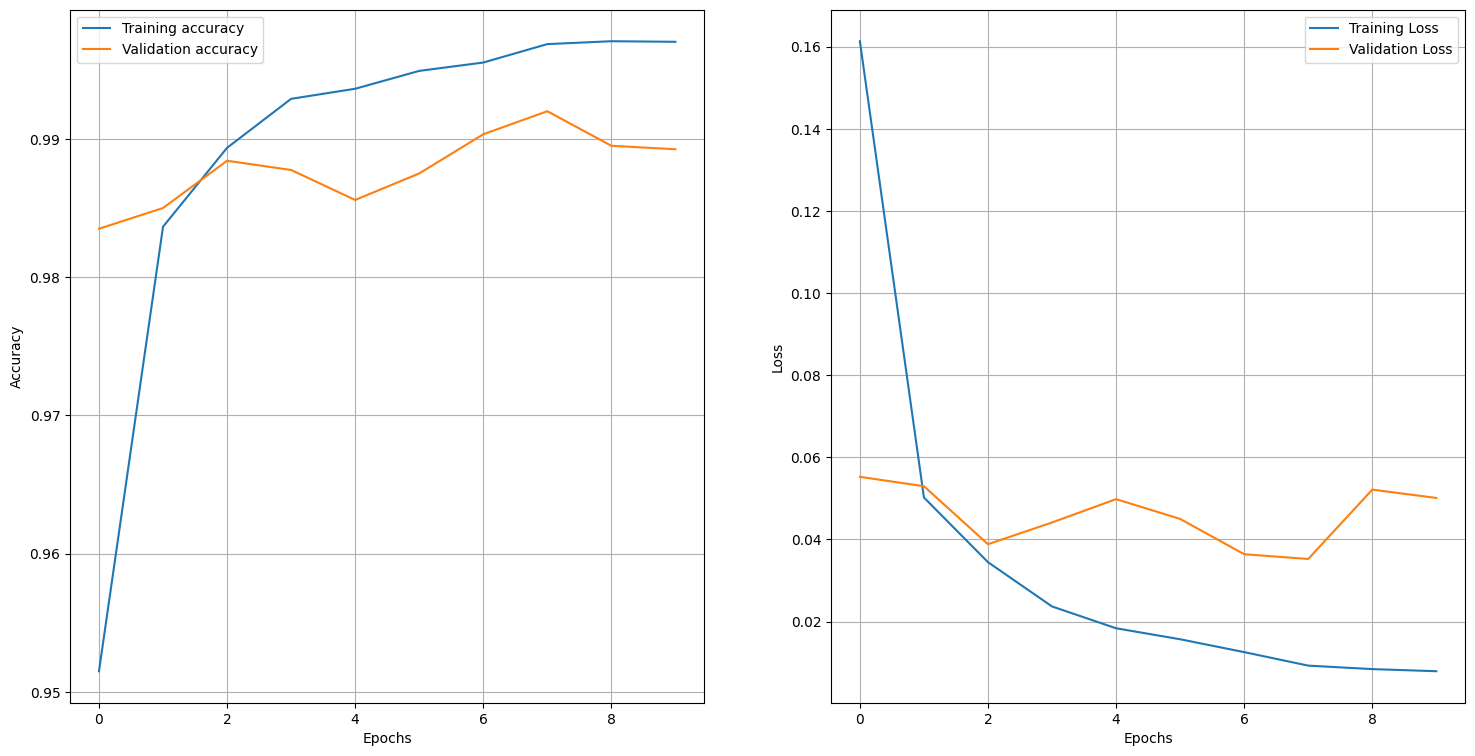

In [51]:
import matplotlib.pyplot as plt  # Correct import for plotting

# Plotting the training history for non-augmented model
plt.figure(figsize=(18, 9))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [52]:
inputs = Input(shape=(28, 28, 1))

# First Conv2D layer
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inputs)
x = MaxPooling2D()(x)

# Second Conv2D layer (use 'x' as input, not 'inputs')
x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

# Flatten and Dense layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

# Output layer
outputs = Dense(10, activation='softmax')(x)

# Define the model
aug_model = Model(inputs, outputs, name='Augmented_Model')

# Display the model architecture
aug_model.summary()

Model: "Augmented_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Fit the model
history = aug_model.fit(x_train1, y_train1, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8500 - loss: 0.4718 - val_accuracy: 0.9400 - val_loss: 0.1948
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9752 - loss: 0.0814 - val_accuracy: 0.9578 - val_loss: 0.1345
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9842 - loss: 0.0521 - val_accuracy: 0.9628 - val_loss: 0.1230
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9680 - val_loss: 0.1064
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.9696 - val_loss: 0.1083
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9714 - val_loss: 0.1065
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9707 - val_loss: 0.1184
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9959 - loss: 0

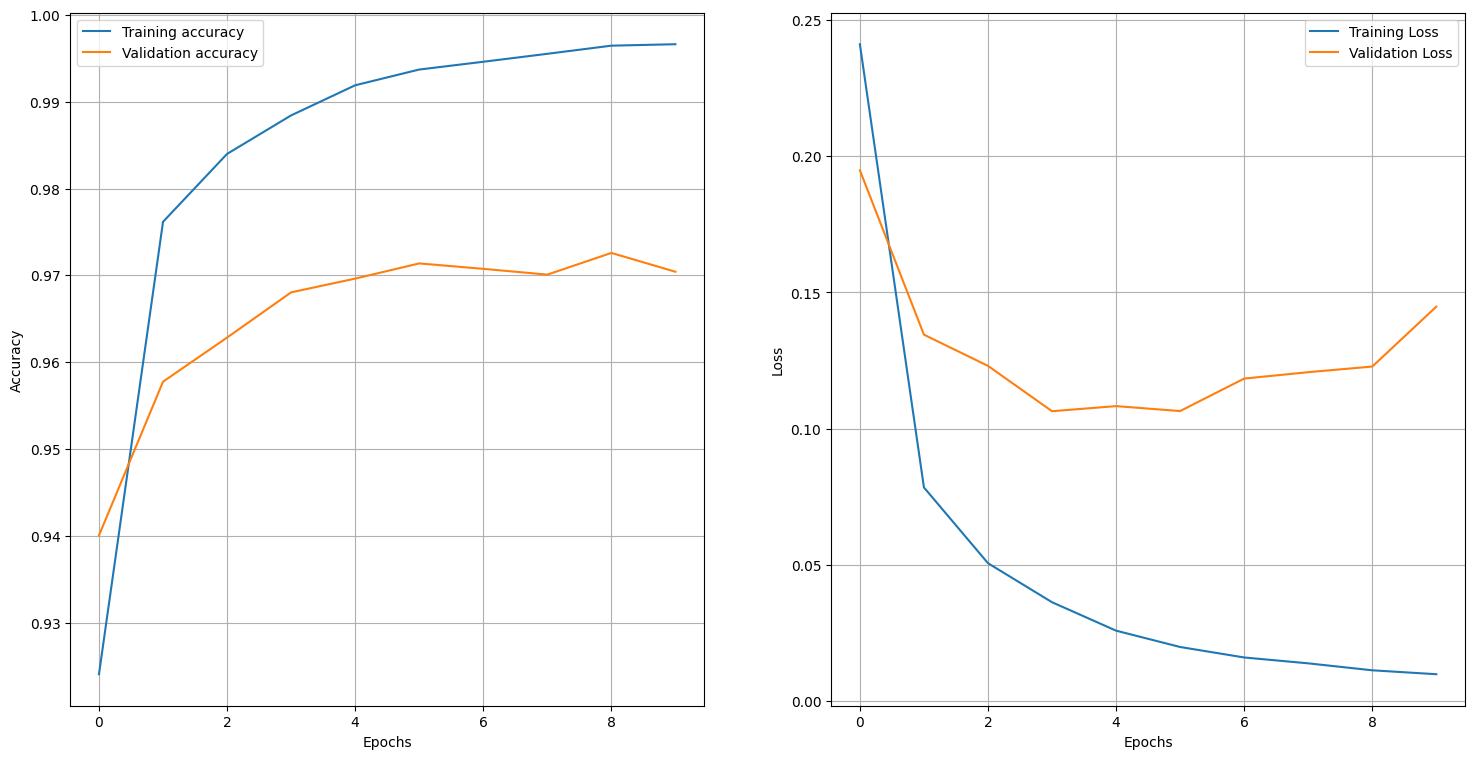

In [55]:
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [56]:
loss, accuracy = model.evaluate(x_test, y_test)
loss1, accuracy1 = model.evaluate(x_test1, y_test1)


loss2, accuracy2 = aug_model.evaluate(x_test, y_test)
loss3, accuracy3 = aug_model.evaluate(x_test1, y_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9886 - loss: 0.0420
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9199 - loss: 0.5928
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0412
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9869 - loss: 0.0556


In [57]:
import pandas as pd
from tabulate import tabulate

# Collect results into a dictionary
results = {
    'Non-Augmented Model': [f'{accuracy*100:.2f}%', f'{accuracy1*100:.2f}%'],
    'Augmented Model': [f'{accuracy2*100:.2f}%', f'{accuracy3*100:.2f}%']
}

# Create a DataFrame
df = pd.DataFrame(results, index=['Non-Augmented Data', 'Augmented Data']).T

# Use tabulate to format the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════╤══════════════════════╤══════════════════╕
│                     │ Non-Augmented Data   │ Augmented Data   │
╞═════════════════════╪══════════════════════╪══════════════════╡
│ Non-Augmented Model │ 99.10%               │ 76.64%           │
├─────────────────────┼──────────────────────┼──────────────────┤
│ Augmented Model     │ 99.21%               │ 98.23%           │
╘═════════════════════╧══════════════════════╧══════════════════╛
